# connect to Aura

This example is based on connecting to Neo4J DBaaS offering

You will need the Connection URI when you create your instance

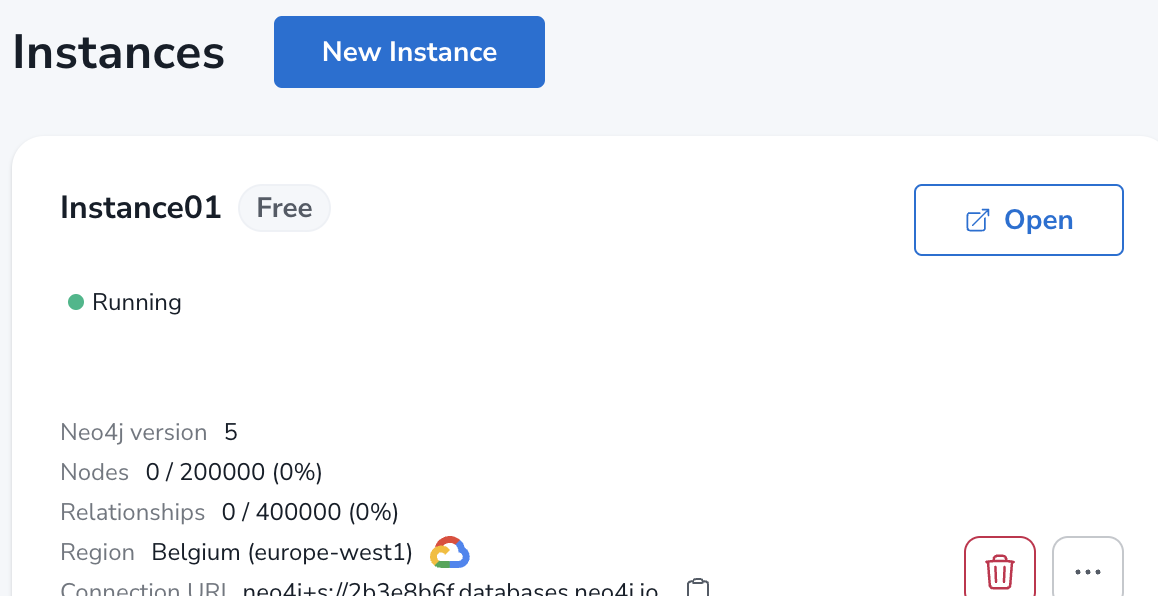


In [ ]:
from neo4j import GraphDatabase

URI =  "neo4j+s://xxx.databases.neo4j.io"
AUTH = ("<Username>", "<Password>")

with GraphDatabase.driver(URI, auth=AUTH) as driver:
    driver.verify_connectivity()

# Write to the
# To create a node representing a person named Alice, use the Cypher clause MERGE:

summary = driver.execute_query(
    "MERGE (:Person {name: $name})",
    name="Alice",
    database_="neo4j",
).summary

print("Created {nodes_created} nodes in {time} ms.".format(
    nodes_created=summary.counters.nodes_created,
    time=summary.result_available_after
))

# # Read from the database
# To retrieve information from the database, use the Cypher clause MATCH:

records, summary, keys = driver.execute_query(
    "MATCH (p:Person) RETURN p.name AS name",
    database_="neo4j",
)

# Loop through results and do something with them
for record in records:
    print(record.data())  # obtain record as dict

# Summary information
print("The query `{query}` returned {records_count} records in {time} ms.".format(
    query=summary.query, records_count=len(records),
    time=summary.result_available_after
))


# Query from the database

records, summary, keys = driver.execute_query("""
    MATCH (p:Person {name: $name})
    DETACH DELETE p
    """, name="Alice",
    database_="neo4j",
)
print(f"Query counters: {summary.counters}.")


